# Homework set 4

Please **submit this Jupyter notebook through Canvas** no later than **Monday December 9, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. On canvas there are hints about creating a nice pdf version.**

Before you hand in, please make sure the notebook runs, by running "Restart kernel and run all cells..." from the Kernel menu.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Noa Roebersen, 12247014

Paul Jungnickel, 15716554

Run the following cell to import NumPy, Matplotlib. If anything else is needed you can import this yourself.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1
N.B.1. you are to implement the methods yourself.

N.B.2. Tentative distribution of points is 2+1+2+2+2 points (plus 1 point makes 10).

Given a function $f$, let $T(f,a,b,m)$ denote the composite trapezoid rule with $m$ subintervals over the interval $[a,b]$. 

## (a)
Approximate the integral of $x^{-3}$ over $[a,b] = [ \frac{1}{10}, 100 ]$ by the composite trapezoid rule $T(f,a,b,m)$ for $m = 2^k$. Plot the absolute approximation error for different values of $k$. Find the smallest $k$ such that the exact error is less than $\epsilon = 10^{-3}$. Explain the slow convergence.

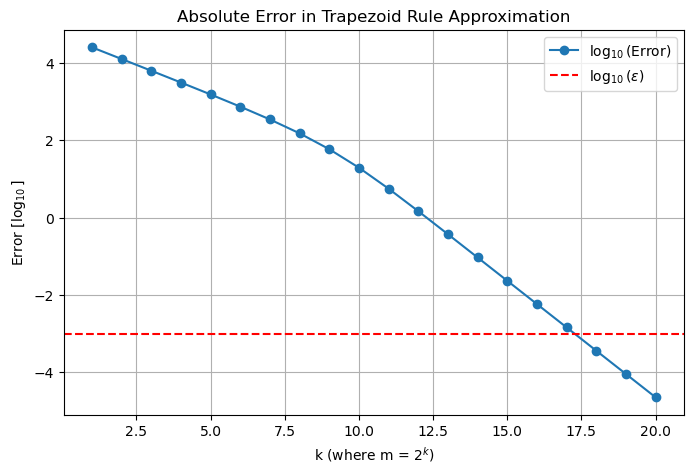

The smallest k such that the error is less than epsilon is: 18


In [8]:
function_evaluations = 0

def f(x):
    return x ** -3

def exact_integral(a, b):
    return -0.5 * (1 / b**2 - 1 / a**2)

def trapezoid_rule(f, a, b, m):
    global function_evaluations
    h = (b - a) / m
    x = np.linspace(a, b, m + 1)
    y = f(x)
    
    function_evaluations += len(x)
    return h * (0.5 * y[0] + np.sum(y[1:-1]) + 0.5 * y[-1])

a, b = 1/10, 100
exact_value = exact_integral(a, b)
epsilon = 1e-3

k_values = np.arange(1, 21)
errors = []
m_values = 2**k_values

for m in m_values:
    approx_value = trapezoid_rule(f, a, b, m)
    error = abs(approx_value - exact_value)
    errors.append(error)

k_min = k_values[np.where(np.array(errors) < epsilon)[0][0]]

plt.figure(figsize=(8, 5))
plt.plot(k_values, np.log10(errors), marker='o', label="$\log_{10}$(Error)")
plt.axhline(y=np.log10(epsilon), color='r', linestyle='--', label=r"$\log_{10}(\epsilon)$")
plt.title("Absolute Error in Trapezoid Rule Approximation")
plt.xlabel("k (where m = $2^k$)")
plt.ylabel(r"Error [$\log_{10}$]")
plt.legend()
plt.grid()
plt.show()

print(f"The smallest k such that the error is less than epsilon is: {k_min}")


Explanation slow convergence: The function has significant curvature and steep gradients. The trapezoid rule assumes linearity between points, and struggles with such functions. So we need a lot of points to make a good approximation of the exact integral.

## (b)

To improve the convergence rate of the above problem, we may use an adaptive strategy, as discussed in the book and the lecture. Consider the following formulas for approximate integration
$$I_1(f,a,b) = T(f,a,b,1)$$
$$I_2(f,a,b) = T(f,a,b,2).$$
Show, based on the precise error estimates for the trapezoid rule from the book/lecture that the error in $I_2$ can be estimated by a formula of the form 
$$E_2 = C (I_1 - I_2)$$
and determine the constant $C$ (if you can't find $C$, you may take $C = 0.5$).

### Derivation of Error for Composite Trapezoid Rule with $ m $ subintervals

The composite trapezoid rule with $ m $ subintervals for function $f(x)$ on $[a,b]$,

$$
T(f, a, b, m) = \frac{b-a}{2m} \left[f(a) + 2 \sum_{i=1}^{m-1} f\left(a + i \frac{b-a}{m}\right) + f(b) \right].
$$

The exact integral,

$$
I(f) = \int_a^b f(x) \, dx.
$$

The error in the approximation, $ E_T^m $,

$$
E_T^m = I(f) - T(f, a, b, m).
$$

### Taylor Expansion of $ f(x) $

$$
f(x) = f(x_i) + f'(x_i)(x - x_i) + \frac{f''(x_i)}{2!}(x - x_i)^2 + \frac{f^{(3)}(x_i)}{3!}(x - x_i)^3 + \cdots.
$$

### Error Contribution from Each Subinterval

The error in the trapezoidal approximation for each subinterval $ [x_{i-1}, x_i] $ depends on the second derivative of $ f(x) $ because the error arises due to the curvature of $ f(x) $.

The error for the trapezoid rule on a single subinterval,

$$
E_T^{\text{single}} = -\frac{(x_i - x_{i-1})^3}{12} f^{(2)}(\xi),
$$

where $ \xi $ is some point in the interval $ [x_{i-1}, x_i] $ and $ f^{(2)}(\xi) $ is the second derivative of $ f(x) $.

### Summing the Errors Over All Subintervals

$$
E_T^m = \sum_{i=1}^{m} E_T^{\text{single}} = \sum_{i=1}^{m} \left( -\frac{(x_i - x_{i-1})^3}{12} f^{(2)}(\xi_i) \right).
$$

Each subinterval has length $ \frac{b-a}{m} $, so the error for each subinterval is,

$$
E_T^{\text{single}} = -\frac{\left( \frac{b-a}{m} \right)^3}{12} f^{(2)}(\xi_i).
$$

$$
E_T^m = -\frac{(b-a)^3}{12m^3} \sum_{i=1}^{m} f^{(2)}(\xi_i).
$$

### Approximation of the Sum

We can approximate the sum $ \sum_{i=1}^{m} f^{(2)}(\xi_i) $ by $ m $ times the average value of $ f^{(2)}(x) $ over the interval $ [a, b] $. Hence, we approximate,

$$
E_T^m \approx -\frac{(b-a)^3}{12m^3} m f^{(2)}(\xi),
$$

where $ \xi \in [a, b] $.

Thus, the error in the composite trapezoid rule for $ m $ subintervals,

$$
E_T^m \approx -\frac{(b-a)^3}{12m^2} f^{(2)}(\xi).
$$

### Determine constant C

$$
E_T^m = -\frac{(b-a)^3}{12 m^2} f^{''}(\xi)
$$

For $I_1$ and $I_2$,

$$
E_1 = -\frac{(b-a)^3}{12} f^{''}(\xi)
$$
$$
E_2 = -\frac{(b-a)^3}{12 \cdot 2^2} f^{''}(\xi)
$$

Giving, $E_2 = \frac{E_1}{4}$.
$$
I_1 - I_2 = I_{exact} + E_1 - (I_{exact} + E_2) = 3 E_2
$$

So,

$$
E_2 = \frac{I_1 - I_2}{3},
$$

giving $C=1/3$.



## (c)
An adaptive strategy for computing the integral on an interval $[a,b]$ now is: Compute $I_2$ and $E_2$, and accept $I_2$ as an approximation when the estimated error $E_2$ is less or equal than a desired tolerance $\epsilon$.  Otherwise, apply the procedure to 
$\int_a^{\frac{b+a}{2}} f(x) \, dx$ and $\int_{\frac{b+a}{2}}^b f(x) \, dx$ with tolerances $\frac{\epsilon}{2}$.

Write a recursive python routine that implements the adaptive strategy.

Then apply this routine to the function $x^{-3}$ with $a, b, \epsilon$ as before. What is the exact error in the obtained approximation? 

In [ ]:

def adaptive_integration(f, a, b, epsilon, m=1):
    """
    Adaptive integration using the trapezoidal rule.
    
    Parameters:
    - f: Function to integrate.
    - a, b: Interval endpoints.
    - epsilon: Desired error tolerance.
    - m: number of subintervals
    
    Returns:
    - Approximated integral value and the error estimate.
    """
    m = 1
    I_1 = trapezoid_rule(f, a, b, m)
    I_2 = trapezoid_rule(f, a, b, 2 * m)

    error_estimate = abs(I_2 - I_1) / 3

    # end subdivision and return integral (tolerance is reached)
    if error_estimate <= epsilon:
        return I_2, error_estimate

    # recursive step, subdivide the interval only if the error estimate is too large
    # (this results in intervals of varying sizes)
    mid = (a + b) / 2
    left_result, left_error = adaptive_integration(f, a, mid, epsilon / 2, m)
    right_result, right_error = adaptive_integration(f, mid, b, epsilon / 2, m)
    
    total_result = left_result + right_result
    total_error = left_error + right_error
    
    return total_result, total_error

function_evaluations = 0
result, error = adaptive_integration(f, a, b, epsilon,m=1)

print(f"Adaptive Integration Result: {result} +- {error}")

exact_int = exact_integral(a, b)
exact_error = abs(result - exact_int)

print(f"Exact Integral: {exact_int}")
print(f"Exact Error: {exact_error}")



Adaptive Integration Result: 50.00014849011892 +- 0.0001776110975552349
Exact Integral: 49.99994999999999
Exact Error: 0.0001984901189260313


## (d)

Modify the code of (c) so that the number of function evaluations is counted. Optimize your implementation such that no unnecessary function evaluations are performed.

Compare the number of function evaluations used in the adaptive strategy of (c) with the result of (a). 
(*Hint*: To count the number of function evaluations, you may use a global variable.)


In [11]:
function_evaluations = 0
result, error = adaptive_integration(f, a, b, epsilon,m=1)
print(f"Adaptive Integration Result: {result}")
print(f"Function Evaluations (Adaptive, part c): {function_evaluations}")

function_evaluations = 0
# From a) m = 2^k for k=18
m = 2**k_min
T_result = trapezoid_rule(f, a, b, m)
print(f"Trapezoid Rule Result (from part a): {T_result}")
print(f"Function Evaluations (Trapezoid, part a): {function_evaluations}")

Adaptive Integration Result: 50.00014849011892
Function Evaluations (Adaptive, part c): 48345
Trapezoid Rule Result (from part a): 50.000313068891145
Function Evaluations (Trapezoid, part a): 262145


## (e)
In the course of executing the recursive procedure, some subintervals are refined (split into two subintervals) while others aren't as a result of the choices made by the algorithm. It turns out that the choices made by this algorithm are not always optimal. Other algorithms, that decide in a different way which subinterval needs to be refined, may be more efficient in the sense that they require less function evaluations (while using the same formulas for the approximate integral and the approximate error associated with a subinterval).

Can you explain why this is the case? Devise an alternative, non-recursive algorithm that addresses this issue and should to lead a more efficient integral computation. Describe your approach and algorithm in about 5 to 10 sentences (bullet points).


Even though the recursive procedure targets subintervals with large errors, it is still not always optimal, because
- It does not prioritize largest error across all current subintervals. It would be more sufficient to first divide intervals with large errors.
- This method fully subdivides (until given tolerance) one interval before considering others, this means that some intervals with very large errors might not have been considered and unnecessarily divides intervals that already have relatively low errors.

Different method: Priority-Based Iterative Adaptive Integration
- Start on interval $[a,b]$ and calculate $I_1, I_2$ and $E_2$, keeping track of the intervals and their errors and the calculated integrals
- Prioritize the list of intervals on their error
- While the first interval exceeds the tolerance, subdivide this interval and remove it from the list while adding the two separate intervals and their errors
- Stop when the tolerance is reached
- Return the added integrals and their errors